In [1]:
import pandas as pd
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Limpio.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,DireccionViento,CoberturaNubes,IndiceUV,CodCondCielo,DesCondCielo,CodDirViento,DesDirViento,VelocidadRafaga,Precipitacion,DPT
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,0.0,70,0,4,Cielo nublado,4,Sureste,17.0,0.0,15.0
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,0.0,70,0,2,Poco nuboso,4,Sureste,15.0,0.0,15.0
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,15.0
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,0.0,70,0,2,Poco nuboso,4,Sureste,13.0,0.0,16.0


In [2]:
datosGeneracion["MesDia"] = datosGeneracion["NumMes"].apply(lambda x: f"{x:02d}") + datosGeneracion["NumDia"].apply(lambda x: f"{x:02d}")

In [3]:
datosGeneracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               18946 non-null  datetime64[ns]
 1   Anio                18946 non-null  int64         
 2   Mes                 18946 non-null  int64         
 3   NumMes              18946 non-null  int64         
 4   NumSemana           18946 non-null  int64         
 5   NumDiaAnio          18946 non-null  int64         
 6   Dia                 18946 non-null  int64         
 7   NumDia              18946 non-null  int64         
 8   Hora                18946 non-null  int64         
 9   NumHora             18946 non-null  int64         
 10  Generacion          18946 non-null  float64       
 11  Temperatura         18946 non-null  float64       
 12  ProbabilidadLluvia  18946 non-null  int64         
 13  HumedadRelativa     18946 non-null  float64   

In [10]:
datos_sinfecha = datosGeneracion.drop(["Fecha", "DesCondCielo", "DesDirViento"], axis=1)
datos_sinfecha["MesDia"] = datos_sinfecha["MesDia"].astype(int)

In [5]:
datos_sinfecha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anio                18946 non-null  int64  
 1   Mes                 18946 non-null  int64  
 2   NumMes              18946 non-null  int64  
 3   NumSemana           18946 non-null  int64  
 4   NumDiaAnio          18946 non-null  int64  
 5   Dia                 18946 non-null  int64  
 6   NumDia              18946 non-null  int64  
 7   Hora                18946 non-null  int64  
 8   NumHora             18946 non-null  int64  
 9   Generacion          18946 non-null  float64
 10  Temperatura         18946 non-null  float64
 11  ProbabilidadLluvia  18946 non-null  int64  
 12  HumedadRelativa     18946 non-null  float64
 13  VelocidadViento     18946 non-null  float64
 14  DireccionViento     18946 non-null  float64
 15  CoberturaNubes      18946 non-null  int64  
 16  Indi

In [11]:
datos_sinfecha["Generacion_prev_day"] = datos_sinfecha["Generacion"].shift(1)
datos_dropna = datos_sinfecha.dropna(how="any", axis= 0)

In [18]:
print(datos_dropna.describe().round(2).T.to_latex(index = True))

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Anio & 18945.000000 & 2022.070000 & 0.730000 & 2021.000000 & 2022.000000 & 2022.000000 & 2023.000000 & 2023.000000 \\
Mes & 18945.000000 & 211.510000 & 7.520000 & 199.000000 & 205.000000 & 212.000000 & 218.000000 & 224.000000 \\
NumMes & 18945.000000 & 6.620000 & 3.320000 & 1.000000 & 4.000000 & 7.000000 & 9.000000 & 12.000000 \\
NumSemana & 18945.000000 & 27.530000 & 14.640000 & 1.000000 & 15.000000 & 29.000000 & 39.000000 & 53.000000 \\
NumDiaAnio & 18945.000000 & 183.260000 & 100.080000 & 0.000000 & 100.000000 & 191.000000 & 263.000000 & 360.000000 \\
Dia & 18945.000000 & 6422.060000 & 228.820000 & 6026.000000 & 6223.000000 & 6423.000000 & 6620.000000 & 6817.000000 \\
NumDia & 18945.000000 & 15.720000 & 8.820000 & 1.000000 & 8.000000 & 16.000000 & 23.000000 & 31.000000 \\
Hora & 18945.000000 & 154117.240000 & 5491.940000 & 144601.000000 & 149337.000000 & 154136.000000 & 158872.000000 

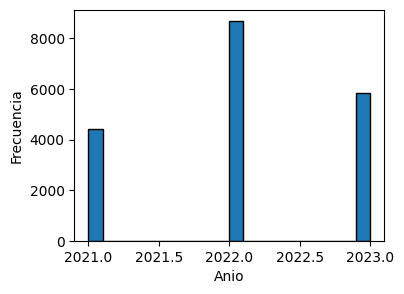

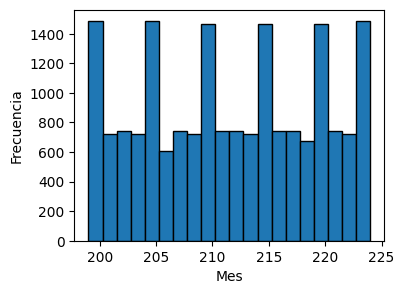

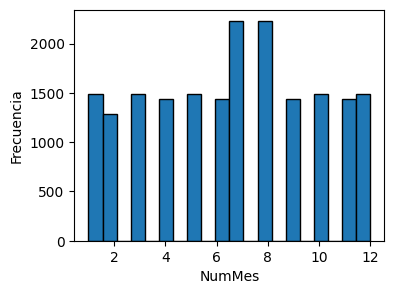

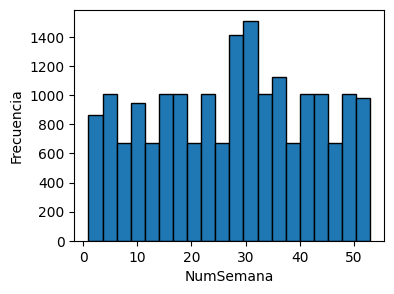

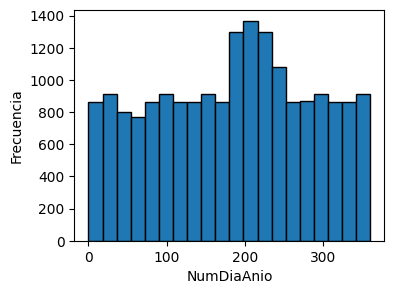

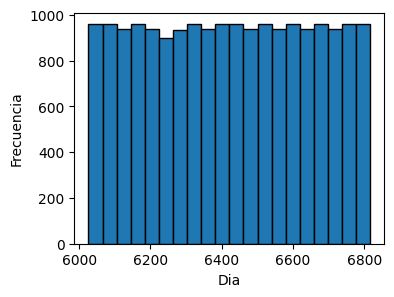

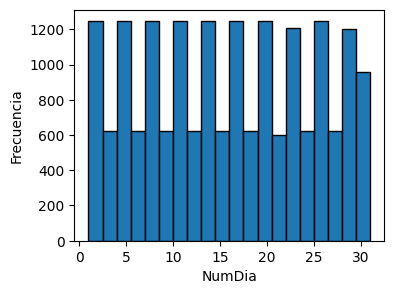

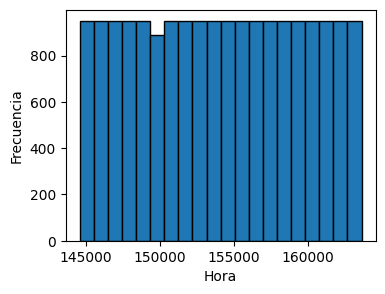

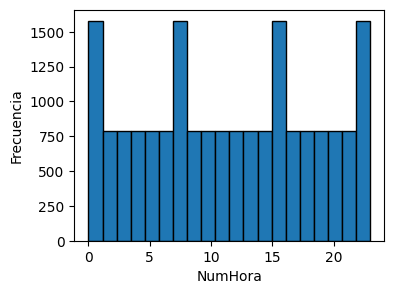

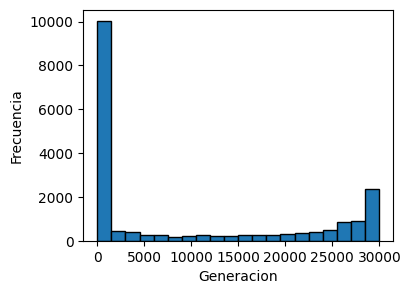

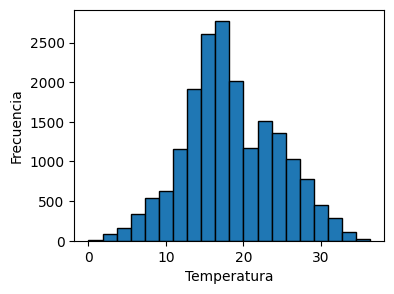

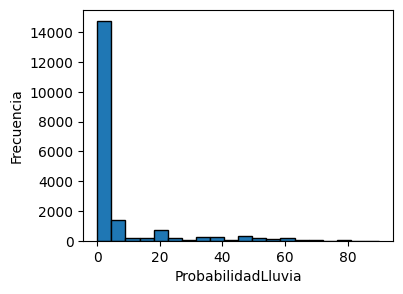

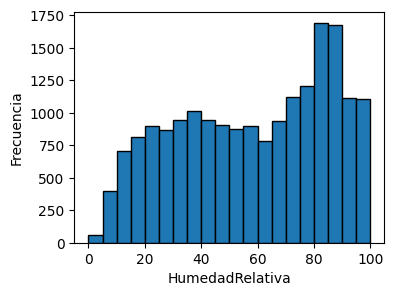

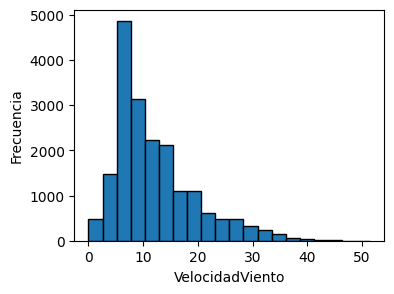

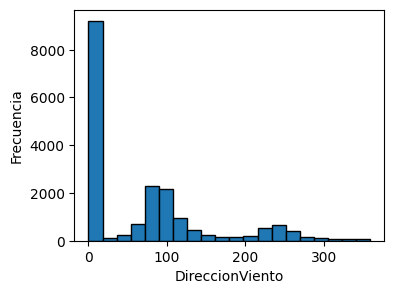

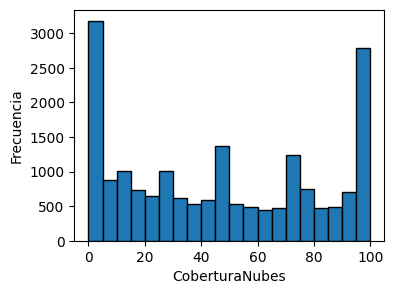

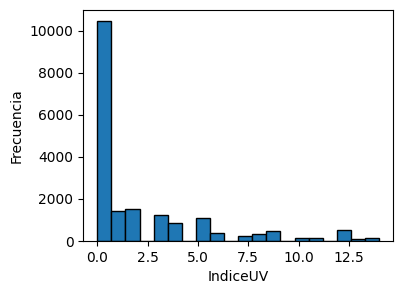

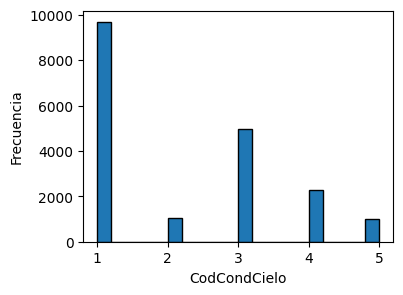

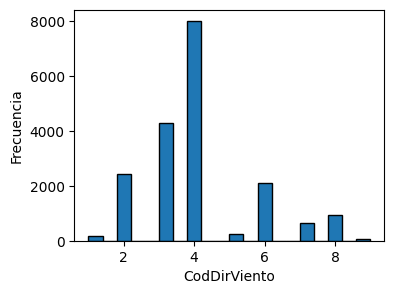

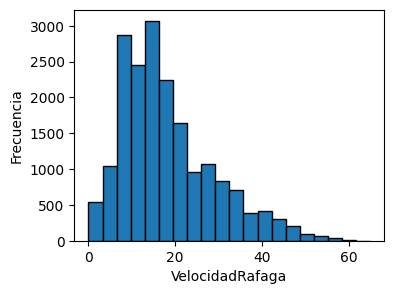

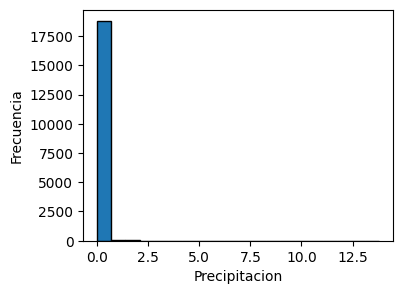

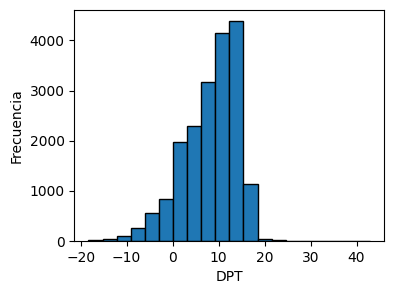

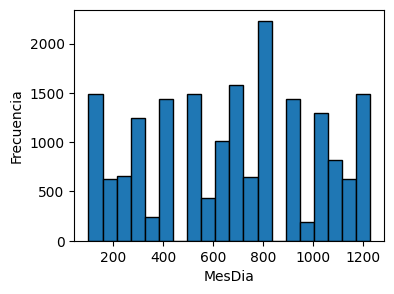

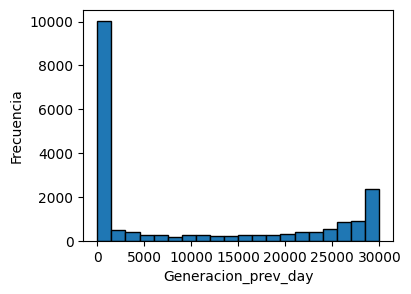

In [16]:
import matplotlib.pyplot as plt
for columna in datos_dropna.columns:
    plt.figure(figsize=(4, 3))
    datos_dropna[columna].plot(kind='hist', bins=20, edgecolor='black')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decompose_generacion(df, share_type='count', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

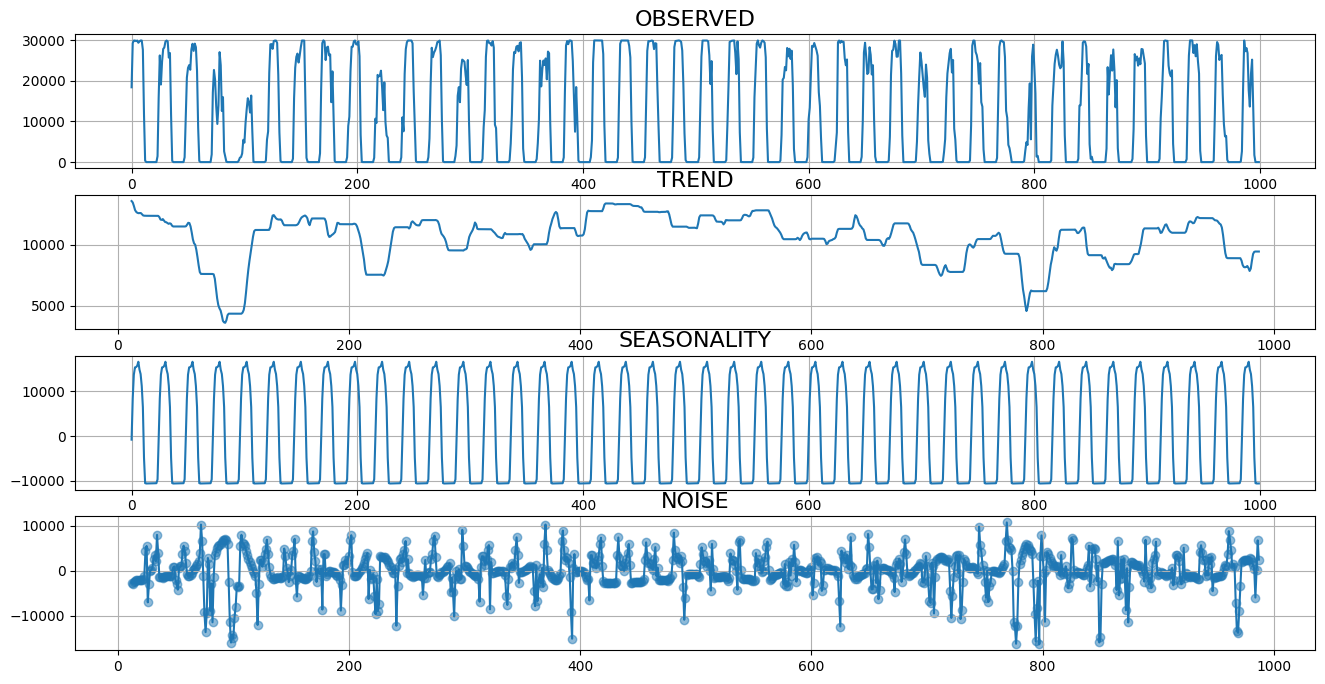

In [8]:
decompose_generacion(datos_sinfecha, share_type="Generacion", samples=1000, period = 24)

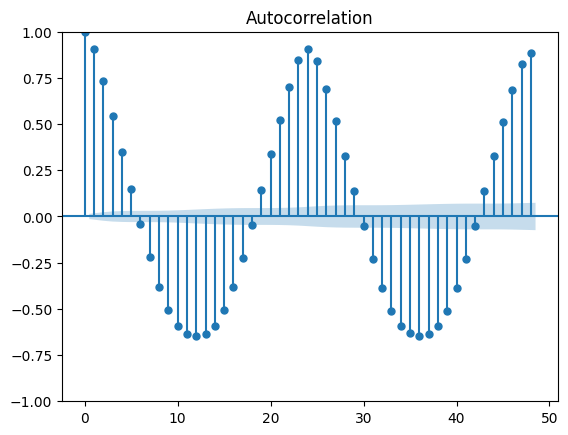

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(datos_sinfecha["Generacion"].values, lags=48)
plt.show()

In [46]:
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_squared_error as mean_squared_error
from sklearn.metrics import r2_score as r2_score
import seaborn as sns

def train_time_series_with_folds(df, model, horizon=24*10):
    X = df.drop('Generacion', axis=1)
    #X = df[['Anio', 'NumDiaAnio', 'Temperatura', 'CodCondCielo', 'CodDirViento', 'IndiceUV', 'NumDia', 
   # 'NumHora', 'ProbabilidadLluvia', 'DPT', 'CoberturaNubes']]
    y = df['Generacion']
    
    #take last week of the dataset for validation
    X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    
    #create, train and do inference of the model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    #calculate MAE
    mae = np.round(mean_absolute_error(y_test, predictions), 3)
    mape = np.round(mean_absolute_percentage_error(y_test, predictions), 3)    
    r2 = np.round(r2_score(y_test, predictions), 3)    
    rmse = np.round(np.sqrt(mean_squared_error(y_test, predictions)), 3)    
    
    #plot reality vs prediction for the last week of the dataset
    fig = plt.figure(figsize=(16,8))
    plt.title(f'Real vs Prediction - MAE {mae} - MAPE {mape} - R2 {r2} - RMSE {rmse}', fontsize=20)
    plt.plot(y_test, color='red')
    plt.plot(pd.Series(predictions, index=y_test.index), color='green')
    plt.xlabel('Hour', fontsize=16)
    plt.ylabel('Generacion', fontsize=16)
    plt.legend(labels=['Real', 'Prediction'], fontsize=16)
    plt.grid()
    plt.show()
    
    #create a dataframe with the variable importances of the model
    df_importances = pd.DataFrame({
        'feature': model.feature_name_,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    #plot variable importances of the model
    plt.title('Variable Importances', fontsize=16)
    sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
    plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 18706, number of used features: 23
[LightGBM] [Info] Start training from score 9749.119173


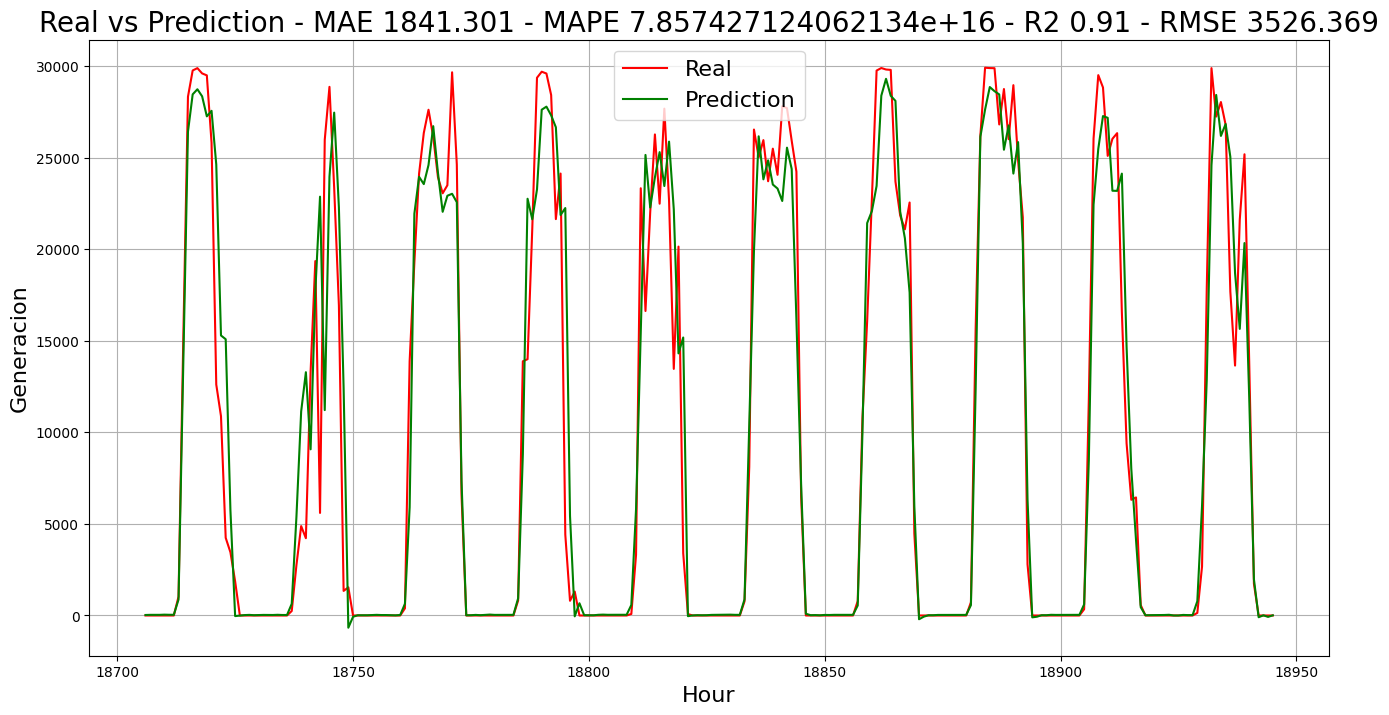

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


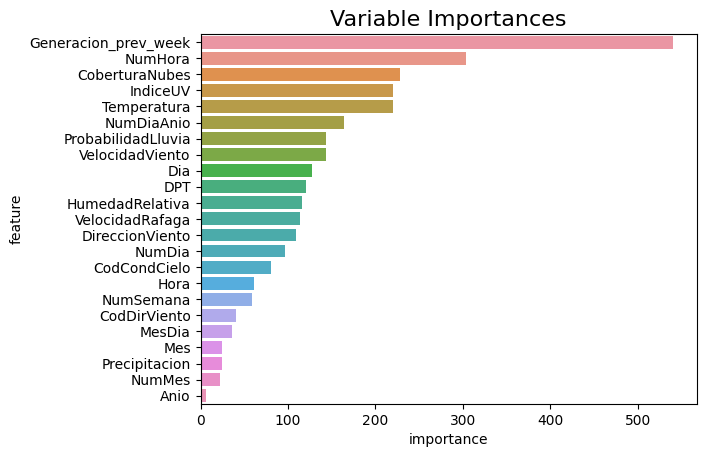

In [48]:
train_time_series_with_folds(datos_sinfecha, LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 18705, number of used features: 23
[LightGBM] [Info] Start training from score 9749.640377


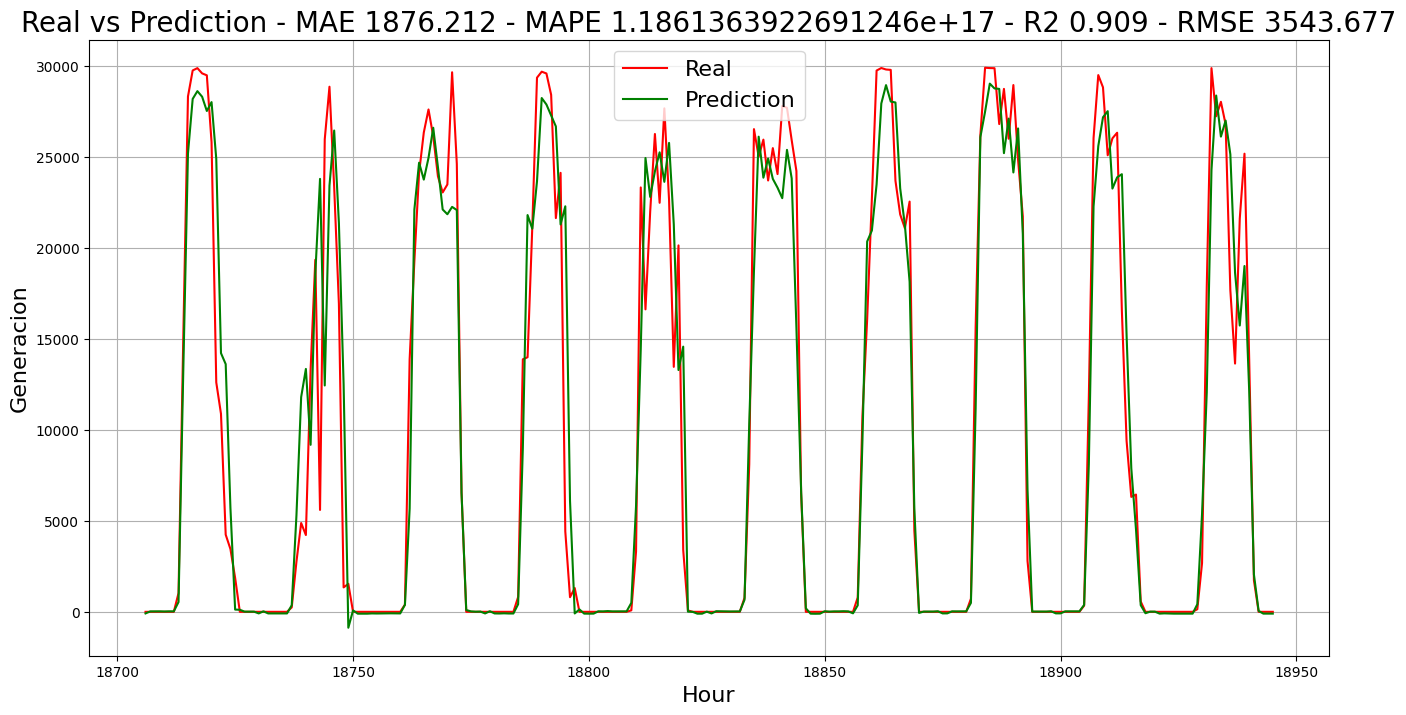

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


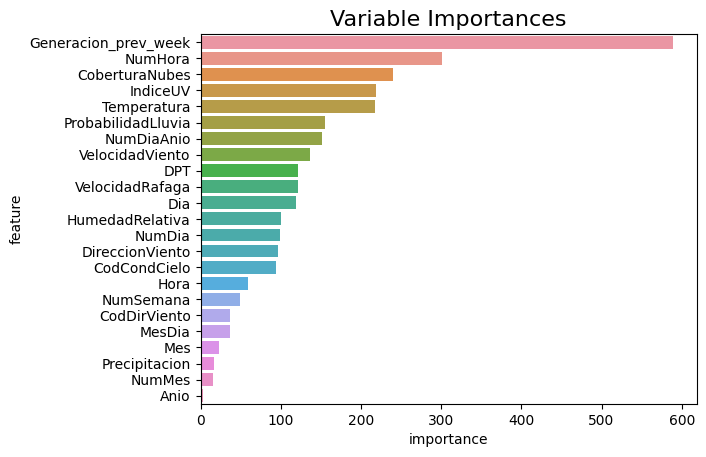

In [49]:
datos_sinfecha["Generacion_prev_week"] = datos_sinfecha["Generacion"].shift(1)
datos_dropna = datos_sinfecha.dropna(how="any", axis= 0)
train_time_series_with_folds(datos_dropna, LGBMRegressor())

In [19]:
#Procesamos los modelos
from tqdm import tqdm
import multiprocessing
import random
from timeit import default_timer as timer
X = datos_dropna.drop('Generacion', axis=1)
y = datos_dropna['Generacion']
try:
        df_results_ed = pd.read_csv('./Resultados_modelos_con_season.csv', index_col = 0)
except:
        models_ed = ['Ada Boost', 'Bagging', 'Boosting', 'Random Forest', 'XGBoost', 'LGBM']
        n_jobs = multiprocessing.cpu_count()
        results_ed = {
                'model' : [],
                'mse' : [],
                'rmse' : [],
                'mae' : [],
                'r2' : [],
                'mape' : [],
                'time' : []
        }
        for i in tqdm(range(30)):
                horizon = 24 * random.randint(7, 30)
                porcentaje = random.randint(7, 10) / 10
                lentrain100 = len(datos_dropna)-horizon
                lentrainP = round(lentrain100 * porcentaje, 0)

                horizon = int(horizon)
                lentrain100 = int(lentrain100)
                lentrainP = int(lentrainP)
                X_train, X_test = X.iloc[(lentrain100 - lentrainP):-horizon,:], X.iloc[-horizon:,:]
                y_train, y_test = y.iloc[(lentrain100 - lentrainP):-horizon], y.iloc[-horizon:]
                for m in models_ed:
                        start = timer()
                        model = fit(X_train, y_train, m, n_jobs = n_jobs)
                        end = timer()
                        y_pred = model.predict(X_test)
                        results_ed['model'].append(m)
                        results_ed['mse'].append(mse(y_test, y_pred))
                        results_ed['rmse'].append(np.sqrt(mse(y_test, y_pred)))
                        results_ed['mae'].append(mae(y_test, y_pred))
                        results_ed['r2'].append(r2(y_test, y_pred))
                        results_ed['mape'].append(mape(y_test, y_pred))
                        results_ed['time'].append(end - start)

                df_results_ed = pd.DataFrame(results_ed)
                df_results_ed.to_csv('./Resultados_modelos_con_season.csv')

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


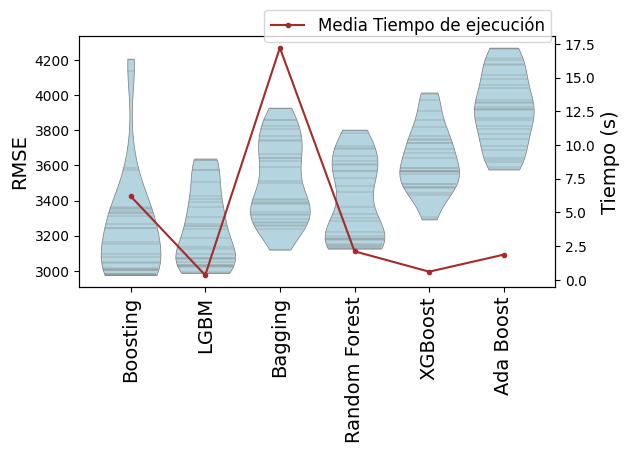

In [20]:
df_results_ed = df_results_ed.sort_values('rmse')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('rmse')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="rmse", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


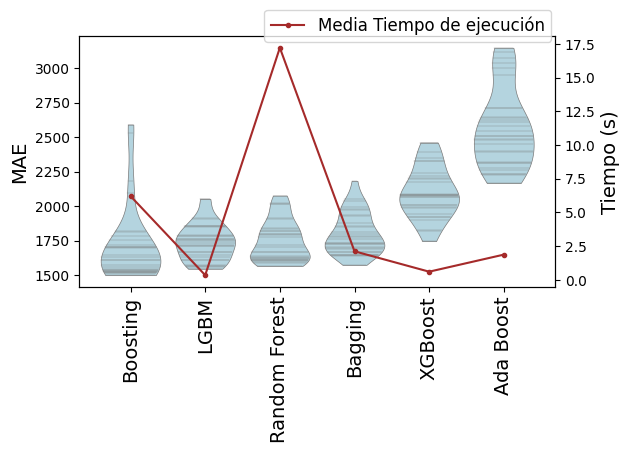

In [21]:
df_results_ed = df_results_ed.sort_values('mae')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mae')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mae", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


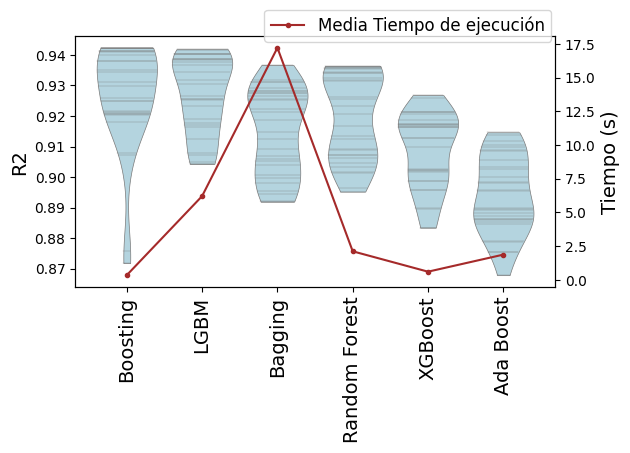

In [22]:
df_results_ed = df_results_ed.sort_values('r2', ascending=False)
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('r2', ascending=False)
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="r2", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('R2', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\FCFM\Gits\03_AprendizajeAutomatico\AprendizajeAutomatico\.condaAA\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


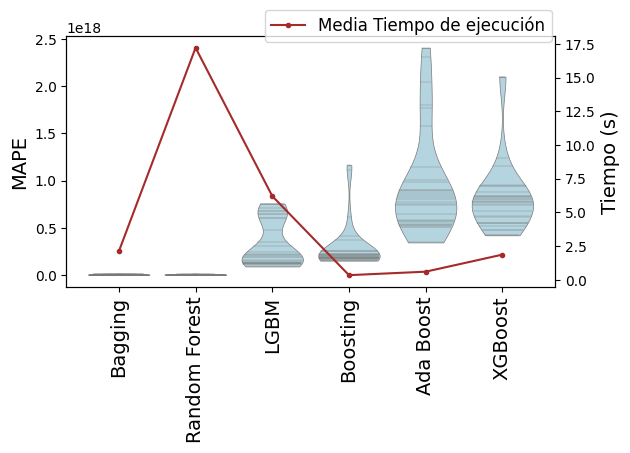

In [23]:
df_results_ed = df_results_ed.sort_values('mape')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()